<a href="https://colab.research.google.com/github/s-reaungamornrat/artificial_intelligence/blob/master/torchvision_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is page following [torch_vision_tutorial.ipynb](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/4a542c9f39bedbfe7de5061767181d36/torchvision_tutorial.ipynb#scrollTo=kTVBxg9mR9FI) from pytorch. We will also want to explore [multiobject-tracking](https://colab.research.google.com/github/mlvlab/COSE474/blob/master/3_Object_Detection_and_MOT_tutorial.ipynb)

In [1]:
%matplotlib inline

In [2]:
# check pytorch version
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.9.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.14
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.22.0
astropy                               7.1.0
astropy

In [3]:
!wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip -P data
!cd data && unzip PennFudanPed.zip

--2025-08-05 21:11:05--  https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip
Resolving www.cis.upenn.edu (www.cis.upenn.edu)... 158.130.69.163, 2607:f470:8:64:5ea5::d
Connecting to www.cis.upenn.edu (www.cis.upenn.edu)|158.130.69.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53723336 (51M) [application/zip]
Saving to: ‘data/PennFudanPed.zip’

PennFudanPed.zip    100%[===================>]  51.23M  90.8MB/s    in 0.6s    

2025-08-05 21:11:05 (90.8 MB/s) - ‘data/PennFudanPed.zip’ saved [53723336/53723336]

Archive:  PennFudanPed.zip
   creating: PennFudanPed/
  inflating: PennFudanPed/added-object-list.txt  
   creating: PennFudanPed/Annotation/
  inflating: PennFudanPed/Annotation/FudanPed00001.txt  
  inflating: PennFudanPed/Annotation/FudanPed00002.txt  
  inflating: PennFudanPed/Annotation/FudanPed00003.txt  
  inflating: PennFudanPed/Annotation/FudanPed00004.txt  
  inflating: PennFudanPed/Annotation/FudanPed00005.txt  
  inflating: PennFudanPe

In [4]:
!ls data/PennFudanPed/

added-object-list.txt  Annotation  PedMasks  PNGImages	readme.txt


In [5]:
with open('data/PennFudanPed/readme.txt', 'r') as f:  print(f.read())

1. Directory structure:

PNGImages:   All the database images in PNG format.

PedMasks :   Mask for each image, also in PNG format. Pixels are labeled 0 for background, or > 0 corresponding
to a particular pedestrian ID.

Annotation:  Annotation information for each image.  Each file is in the following format (take FudanPed00001.txt as an example):

# Compatible with PASCAL Annotation Version 1.00
Image filename : "PennFudanPed/PNGImages/FudanPed00001.png"
Image size (X x Y x C) : 559 x 536 x 3
Database : "The Penn-Fudan-Pedestrian Database"
Objects with ground truth : 2 { "PASpersonWalking" "PASpersonWalking" }
# Note there may be some objects not included in the ground truth list for they are severe-occluded
# or have very small size.
# Top left pixel co-ordinates : (1, 1)
# Details for pedestrian 1 ("PASpersonWalking")
Original label for object 1 "PASpersonWalking" : "PennFudanPed"
Bounding box for object 1 "PASpersonWalking" (Xmin, Ymin) - (Xmax, Ymax) : (160, 182) - (302, 431)
Pi

In [6]:
!ls data/PennFudanPed/Annotation

FudanPed00001.txt  FudanPed00044.txt  PennPed00013.txt	PennPed00056.txt
FudanPed00002.txt  FudanPed00045.txt  PennPed00014.txt	PennPed00057.txt
FudanPed00003.txt  FudanPed00046.txt  PennPed00015.txt	PennPed00058.txt
FudanPed00004.txt  FudanPed00047.txt  PennPed00016.txt	PennPed00059.txt
FudanPed00005.txt  FudanPed00048.txt  PennPed00017.txt	PennPed00060.txt
FudanPed00006.txt  FudanPed00049.txt  PennPed00018.txt	PennPed00061.txt
FudanPed00007.txt  FudanPed00050.txt  PennPed00019.txt	PennPed00062.txt
FudanPed00008.txt  FudanPed00051.txt  PennPed00020.txt	PennPed00063.txt
FudanPed00009.txt  FudanPed00052.txt  PennPed00021.txt	PennPed00064.txt
FudanPed00010.txt  FudanPed00053.txt  PennPed00022.txt	PennPed00065.txt
FudanPed00011.txt  FudanPed00054.txt  PennPed00023.txt	PennPed00066.txt
FudanPed00012.txt  FudanPed00055.txt  PennPed00024.txt	PennPed00067.txt
FudanPed00013.txt  FudanPed00056.txt  PennPed00025.txt	PennPed00068.txt
FudanPed00014.txt  FudanPed00057.txt  PennPed00026.txt	PennPed00

In [9]:
import os,re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import cycle

def read_annotation(annotation_fpath):
  '''
  Read annotation file of PennFudanPed dataset
  Input:
    annotation_fpath (str): path to annotation
  Output:
    annotation (dict): dict of sequences of object numbers, labels, and bounding boxes, as {obj_num:[], label:[], bbox:[] }
  '''
  assert os.path.isfile(annotation_fpath), f'{annotation_fpath} does not exist'

  with open(annotation_fpath, 'r') as f:  annotation_txt=f.read().split('\n')

  # read annotation
  annotation={'obj_num':[], 'label':[], 'bbox':[] }
  for line in annotation_txt:
    if re.findall('^Original label', line):
      idx=np.nonzero([word.isnumeric() for word in line.split()])[0].item()
      obj_n=int(line.split()[idx])
      label=line.split()[idx+1].strip('"')
    elif re.findall('^Bounding box', line):
      bbox=[[int(x.strip(' ( ) ')) for x in term.split(',')] for term in line.split(':')[-1].split('-')]
      annotation['obj_num'].append(obj_n)
      annotation['label'].append(label)
      annotation['bbox'].append(bbox)
  return annotation

def display_image_overlay(image, mask, annotation):
  '''
  Display each image and mask overlay by annotation
  Input:
    image (tensor): CxHxW or CxYxX uint8
    mask (tensor): 1xHxW or 1xYxX uint8
    annotation (dict): dict containing sequences of bounding box (under key bbox) and label (under key label)
  '''
  assert all(key in annotation for key in ['bbox', 'label'])

  # bounding box colors
  colours = cycle(['r', 'g', 'b', 'm', 'c'])

  # text format for label overlaid on images
  font = {'family': 'serif',
          'color':  'cyan',
          'weight': 'normal',
          'size': 10,
          }

  fig, axs = plt.subplots(1, 2, figsize=(16, 8))
  axs[0].imshow(image.permute(1,2,0)) # HxWxC / YxXxC
  for i, (bbox, color) in enumerate(zip(annotation['bbox'], colours)):
    width,height=[e-s for e, s in zip(bbox[-1], bbox[0])]
    # Create a Rectangle patch
    rect = patches.Rectangle([x-1 for x in bbox[0]], width,height, linewidth=2,edgecolor=color, facecolor='none')
    # Add the patch to the Axes
    axs[0].add_patch(rect)
    axs[0].text(bbox[0][0],bbox[-1][1], annotation['label'][i], fontdict=font)

  axs[1].imshow(mask.permute(1,2,0)) # HxWxC / YxXxC
  for i, (bbox, color) in enumerate(zip(annotation['bbox'], colours)):
    width,height=[e-s for e, s in zip(bbox[-1], bbox[0])]
    # Create a Rectangle patch
    rect = patches.Rectangle([x-1 for x in bbox[0]], width,height, linewidth=2,edgecolor=color, facecolor='none')
    # Add the patch to the Axes
    axs[1].add_patch(rect)
    axs[1].text(bbox[0][0],bbox[-1][1], annotation['label'][i], fontdict=font)

image  <class 'torch.Tensor'> torch.Size([3, 438, 567]) torch.uint8
mask  <class 'torch.Tensor'> torch.Size([1, 438, 567]) torch.uint8
{'obj_num': [1, 2, 3, 4], 'label': ['PASpersonWalking', 'PASpersonWalking', 'PASpersonStanding', 'PASpersonWalking'], 'bbox': [[[178, 123], [271, 410]], [[299, 114], [370, 335]], [[446, 104], [507, 315]], [[521, 119], [565, 258]]]}


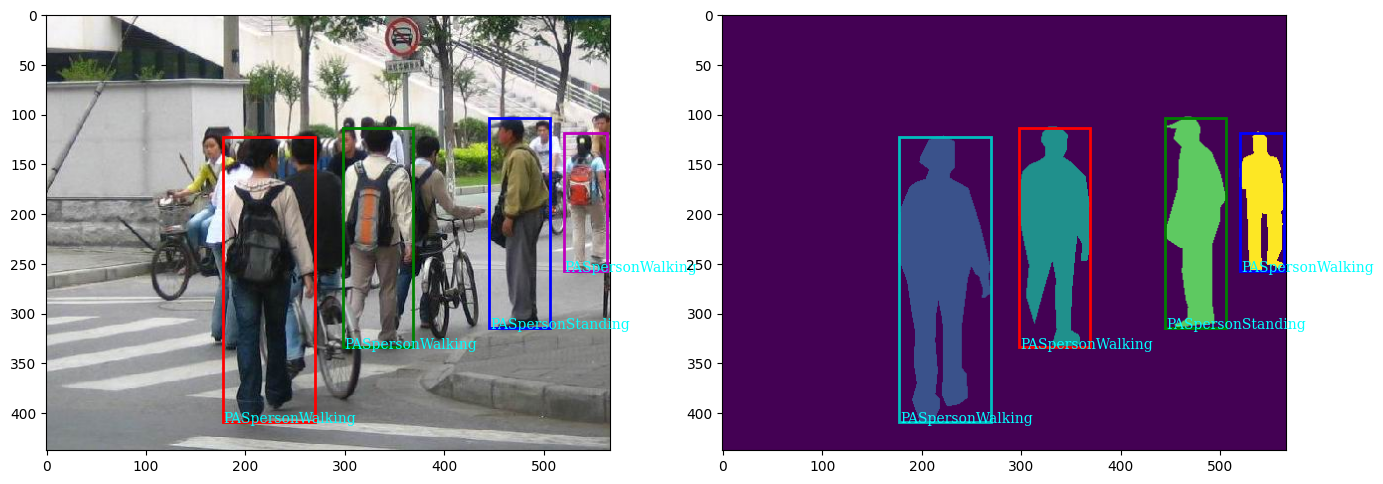

In [10]:
from torchvision.io import read_image


image=read_image('data/PennFudanPed/PNGImages/FudanPed00046.png') # CxHxW -> CxYxX
mask=read_image('data/PennFudanPed/PedMasks/FudanPed00046_mask.png') # CxHxW -> CxYxX
print('image ', type(image), image.shape, image.dtype)
print('mask ', type(mask), mask.shape, mask.dtype)

annotation=read_annotation('data/PennFudanPed/Annotation/FudanPed00046.txt')
print(annotation)
display_image_overlay(image=image, mask=mask, annotation=annotation)

In [11]:
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F

In [12]:
root='data/PennFudanPed'
annotation_dirname='Annotation'
image_dirname='PNGImages'
mask_dirname='PedMasks'

image_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(os.path.join(root, image_dirname)))) # decode s.decode('utf-8')
mask_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(os.path.join(root, mask_dirname)))) # decode s.decode('utf-8')
bbox_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(os.path.join(root, annotation_dirname)))) # decode s.decode('utf-8')
print(len(image_fnames), image_fnames[0])
print(len(mask_fnames), mask_fnames[0])
print(len(bbox_fnames), bbox_fnames[0])
# make sure that files are ordered consistently
for im, msk, bb in zip(image_fnames, mask_fnames, bbox_fnames):
  im=im.decode('utf-8')
  msk=msk.decode('utf-8')
  bb=bb.decode('utf-8')
  assert all(os.path.splitext(im)[0]==os.path.splitext(x)[0].replace('_mask', '') for x in [bb, msk])

170 b'FudanPed00001.png'
170 b'FudanPed00001_mask.png'
170 b'FudanPed00001.txt'


In [13]:
class PennFudanDataset(torch.utils.data.Dataset):

  def __init__(self, root, image_dirname, mask_dirname, annotation_dirname, transforms):

    self.transforms=transforms
    self.image_dirpath=os.path.join(root, image_dirname).encode('utf-8')
    self.mask_dirpath=os.path.join(root, mask_dirname).encode('utf-8')
    self.annotation_dirpath=os.path.join(root, annotation_dirname).encode('utf-8')


    self.image_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(self.image_dirpath.decode('utf-8')))) # decode s.decode('utf-8')
    self.mask_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(self.mask_dirpath.decode('utf-8')))) # decode s.decode('utf-8')
    self.bbox_fnames=np.asarray(sorted(s.encode('utf-8') for s in os.listdir(self.annotation_dirpath.decode('utf-8')))) # decode s.decode('utf-8')

    # make sure that files are ordered consistently
    for im, msk, bb in zip(self.image_fnames, self.mask_fnames, self.bbox_fnames):
      im=im.decode('utf-8')
      msk=msk.decode('utf-8')
      bb=bb.decode('utf-8')
      assert all(os.path.splitext(im)[0]==os.path.splitext(x)[0].replace('_mask', '') for x in [bb, msk])

  def __len__(self):
      return len(self.image_fnames)

  def __getitem__(self, idx):
      idx=idx%len(self.image_fnames)

      image_fpath=os.path.join(self.image_dirpath.decode('utf-8'), self.image_fnames[idx].decode('utf-8'))
      mask_fpath=os.path.join(self.mask_dirpath.decode('utf-8'), self.mask_fnames[idx].decode('utf-8'))
      bbox_fpath=os.path.join(self.annotation_dirpath.decode('utf-8'), self.bbox_fnames[idx].decode('utf-8'))

      # instances are encoded with different colors
      obj_ids=torch.unique(mask)
      # first id is the background, so remove it
      obj_ids=obj_ids[1:]
      num_objs=len(obj_ids)

      # split the color-encoded mask into a set of binary masks
      masks=(mask==obj_ids[:,None,None]).to(dtype=torch.uint8) # LxHxW or LxYxX where L is the number of objects

      # get bounding box coordinates for each mask
      boxes=masks_to_boxes(masks) # Nx4 where N is the number of objects and 4 for x-min,y-min,x-max,y-max

      # there is only one class
      labels=torch.ones((num_objs),dtype=torch.long)
      image_id=idx
      area=(boxes[:, 2]-boxes[:,0])*(boxes[:,3]-boxes[:,1]) # N

      # suppose all instances are not crowd
      iscrowd=torch.zeros((num_objs,), dtype=torch.long)

      # Wrap sample and targets into torchvision tv_tensors
      img=tv_tensors.Image(image) # CxHxW uint8

      target={}
      target['boxes']=tv_tensors.BoundingBoxes(boxes, format='XYXY', canvas_size=F.get_size(img))
      target['masks']=tv_tensors.Mask(masks) # LxHxW
      target['labels']=labels # 1D labels of size N
      target['image_id']=image_id # int
      target['area']=area # 1D area of size N
      target['iscrowd']=iscrowd # 1D tensor of size N

      if self.transforms is not None: img, target = self.transforms(img, target)

      return img, target

dataset=PennFudanDataset(root='data/PennFudanPed', image_dirname='PNGImages', mask_dirname='PedMasks', annotation_dirname='Annotation', transforms=None)
dataset

image  torch.Size([3, 438, 567]) <class 'torchvision.tv_tensors._image.Image'> torch.uint8
target  {'boxes': BoundingBoxes([[177., 122., 270., 409.],
               [298., 113., 369., 334.],
               [445., 103., 506., 314.],
               [520., 118., 564., 257.]], format=BoundingBoxFormat.XYXY, canvas_size=[438, 567]), 'masks': torch.Size([4, 438, 567]), 'labels': tensor([1, 1, 1, 1]), 'image_id': 2, 'area': tensor([26691., 15691., 12871.,  6116.]), 'iscrowd': tensor([0, 0, 0, 0])}


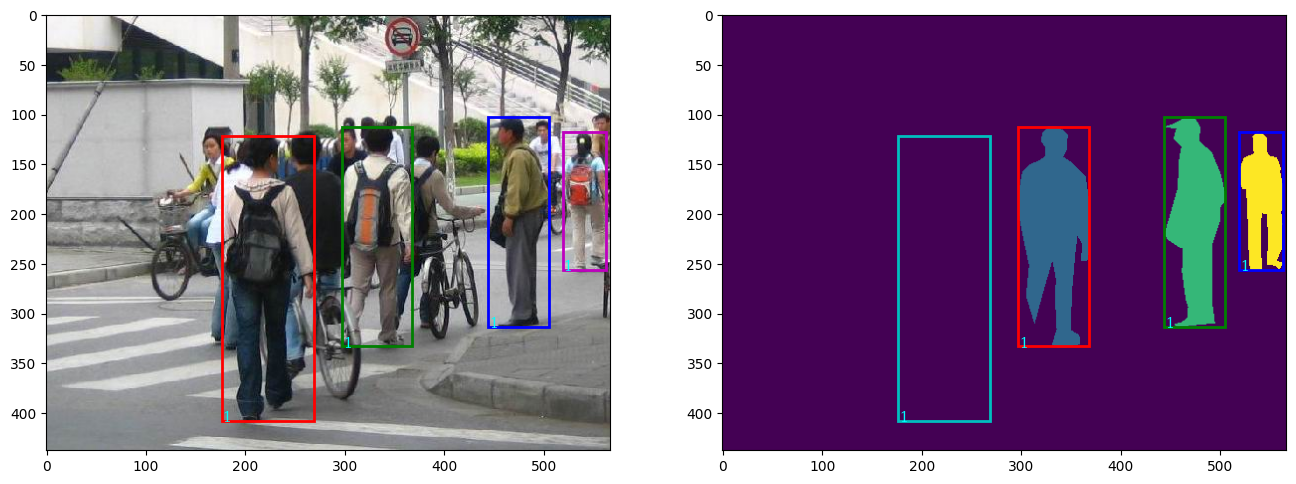

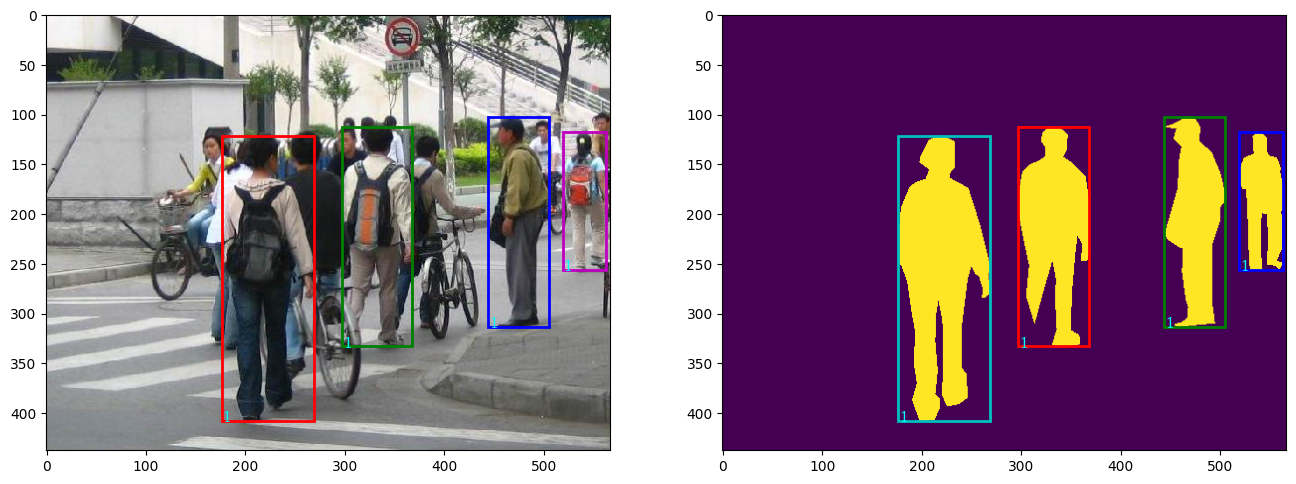

In [14]:
image, target=dataset[2]
print('image ', image.shape, type(image), image.dtype)
print('target ', {k:(v if k!='masks' else v.shape) for k, v in target.items()})
annotation={'bbox':[[box.squeeze()[2*i:(2*i+2)] for i in range(2)] for box in target['boxes'].split(1, dim=0)],
            'label':[f'{l}' for l in target['labels']]}
# does not work here since we ignore background labels
display_image_overlay(image=image, mask=torch.argmax(target['masks'], dim=0, keepdim=True), annotation=annotation)
display_image_overlay(image=image, mask=target['masks'].sum(dim=0, keepdim=True), annotation=annotation)

1 - Finetuning from a pretrained model
Let's suppose that you want to start from a model pre-trained on COCO and want to finetune it for your particular classes. Here is a possible way of doing it


In [17]:
import torchvision
torchvision.models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [19]:
import torchvision.models.detection as detection
print('\n'.join(dir(detection)))

FCOS
FCOS_ResNet50_FPN_Weights
FasterRCNN
FasterRCNN_MobileNet_V3_Large_320_FPN_Weights
FasterRCNN_MobileNet_V3_Large_FPN_Weights
FasterRCNN_ResNet50_FPN_V2_Weights
FasterRCNN_ResNet50_FPN_Weights
KeypointRCNN
KeypointRCNN_ResNet50_FPN_Weights
MaskRCNN
MaskRCNN_ResNet50_FPN_V2_Weights
MaskRCNN_ResNet50_FPN_Weights
RetinaNet
RetinaNet_ResNet50_FPN_V2_Weights
RetinaNet_ResNet50_FPN_Weights
SSD300_VGG16_Weights
SSDLite320_MobileNet_V3_Large_Weights
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_utils
anchor_utils
backbone_utils
faster_rcnn
fasterrcnn_mobilenet_v3_large_320_fpn
fasterrcnn_mobilenet_v3_large_fpn
fasterrcnn_resnet50_fpn
fasterrcnn_resnet50_fpn_v2
fcos
fcos_resnet50_fpn
generalized_rcnn
image_list
keypoint_rcnn
keypointrcnn_resnet50_fpn
mask_rcnn
maskrcnn_resnet50_fpn
maskrcnn_resnet50_fpn_v2
retinanet
retinanet_resnet50_fpn
retinanet_resnet50_fpn_v2
roi_heads
rpn
ssd
ssd300_vgg16
ssdlite
ssdlite320_mobilenet_v3_large
transform


In [29]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# load a model pre-trained on COCO
model=torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights='DEFAULT')

# replace the classifier with a new one, having num_classes which is user-defined
num_classes=2 # 1 class (person)+background
# get number of input features for the classifier
in_features=model.roi_heads.box_predictor.cls_score.in_features
print('in_features ', in_features, ' num_classes ', num_classes)

for child in model.children(): print(child.__class__)
# there are transform, backbone, rpn, roi_heads
model

in_features  1024  num_classes  2
<class 'torchvision.models.detection.transform.GeneralizedRCNNTransform'>
<class 'torchvision.models.detection.backbone_utils.BackboneWithFPN'>
<class 'torchvision.models.detection.rpn.RegionProposalNetwork'>
<class 'torchvision.models.detection.roi_heads.RoIHeads'>


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [35]:
model.backbone

BackboneWithFPN(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): 

In [36]:
model.rpn

RegionProposalNetwork(
  (anchor_generator): AnchorGenerator()
  (head): RPNHead(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
      )
      (1): Conv2dNormActivation(
        (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
      )
    )
    (cls_logits): Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))
    (bbox_pred): Conv2d(256, 12, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [37]:
model.roi_heads

RoIHeads(
  (box_roi_pool): MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(7, 7), sampling_ratio=2)
  (box_head): FastRCNNConvFCHead(
    (0): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

In [39]:
# replace the pre-trained head with a new one
model.roi_heads.box_predictor=FastRCNNPredictor(in_features, num_classes)


2 - Modify the model to add different backbone

In [43]:
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# load a pre-trained model for classification and return only the features
backbone=torchvision.models.mobilenet_v2(weights='DEFAULT').features

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 68.9MB/s]


In [44]:
backbone # check to see the number of output channels

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
  (1): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (2): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

In [46]:
# FasterRCNN needs to know the number of output channels in the backbone. We see that mobilenet_v2 output 1280 channel features
backbone.out_channels=1280
# let's make the RPN generate 5x3 anchors per spatial location, with 5 different sizes and 3 different aspect ratios.
anchor_generator=AnchorGenerator(
    sizes=((32,64,128,256,512)),
    aspect_ratios=((0.5,1.0,2.0))
)

# let's define what are the feature maps that we will use to perform the region of interest cropping, as well as the size of the crop after rescaling.
# if your backbone returns a Tensor, featmap_names is expected to be [0]. More generally, the backbond should return an OrderedDict[Tensor] and in featmap_names
# you can choose which feature maps to use.
roi_pooler=torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'], output_size=7, sampling_ratio=2)
# put the pieces together inside a FasterRCNN model
model=FasterRCNN(backbone, num_classes=2, rpn_anchor_generator=anchor_generator, box_roi_pool=roi_pooler)


### Object detection and instance segmentation model from PennFudan dataset

In this case, we want to finetune from a pre-trained model, given that the dataset is small (approch #1). Here we want to also compute the instance segmentation masks, so we will be using Mask R-CNN

In [50]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

def get_model_instance_segmentation(num_classes):
  # load an instance segmentation model pre-trained on COCO
  model=torchvision.models.detection.maskrcnn_resnet50_fpn_v2(weights='DEFAULT')
  # get number of input features for the classifier
  in_features=model.roi_heads.box_predictor.cls_score.in_features
  print('the number of inpute features for classifiers ', in_features)
  # replace the pre-trained head with a new one
  model.roi_heads.box_predictor=FastRCNNPredictor(in_features,  num_classes)

  # get the number of input features for the mask classifiers
  in_features_mask=model.roi_heads.mask_predictor.conv5_mask.in_channels
  print('the number of input features for mask ', in_features_mask)
  hidden_layer=256
  # and replace the mask predictor with a new one
  model.roi_heads.mask_predictor=MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

  return model

## Put things together

In `references/detection/`, we have a number of helper functions to simplify the training and evaluating detection models. Here we will use `references/detection/engine.py` and `references/detection/utils.py`. Just download everything under `references/detection` to your folder and use them here. On Linux if you have `wget`, you can download them using below commands:

In [51]:
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")

0

In [52]:
!ls

coco_eval.py   data	  sample_data	 utils.py
coco_utils.py  engine.py  transforms.py


Since v0.15.0 torchvision provides new [Transforms API](https://docs.pytorch.org/vision/stable/transforms.html) to easily  write data augmentation pipelines for object detection and segmentation tasks.

Let's write some helper functions for data augmentation / transformation:

In [ ]:
from torchvision.transforms import v2 as T

def get_transform(is_train, image_mean, image_std, min_size, max_size):
  '''
  Input:
    is_train (bool): whether to get transform for training data augmentation
    image_mean (tuple): mean intensity
    image_std (tuple): intensity std
    min_size (int): minimum image size
    max_size (int): maximum image size
  '''
  transforms=[]
  if is_train:
    transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.RandomShortestSize(min_size: Union[List[int], Tuple[int], int], max_size: Optional[int] = None, interpolation: Union[InterpolationMode, int] = InterpolationMode.BILINEAR, antialias: Optional[bool] = True))
  else:
    transforms.append(T.)
  transforms.append(T.ToDtype(torch.float, scale=True))
  transforms.append(T.ToPureTensor())
  transforms.append(T.Normalize(mean=image_mean, std=image_std))
  return T.Compose(transforms)

model.transform.image_mean, model.transform.image_std, model.transform.min_size, model.transform.max_size

## Testing forward() method

Before iterting over the dataset, it is good to see what the model expects during training and inference time on sample data

In [ ]:
import utils

model=torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights='DEFAULT')
dataset=PennFudanDataset(root='data/PennFudanPed', image_dirname='PNGImages', mask_dirname='PedMasks', annotation_dirname='Annotation', transforms=None)

In [54]:
model.transform

GeneralizedRCNNTransform(
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    Resize(min_size=(800,), max_size=1333, mode='bilinear')
)

In [59]:
model.transform.min_size, model.transform.max_size

((800,), 1333)

In [ ]:
import utils

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    collate_fn=utils.collate_fn
)

# For Training
images, targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)  # Returns predictions
print(predictions[0])